In [1]:
import numpy as np 
import torch
from matplotlib import pyplot as plt
from scipy.interpolate import LinearNDInterpolator

In [8]:
# convert (x,y) -> (rho, phi)
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

# convert (rho, phi) -> (x,y)
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# convert (xs, ys) grid -> (rho, phi) coordinates, 
# ex) (np.linspace(-1,1,51), np.linspace(-1,1,51))-> (2601 rho array, 2601 phi array) 
def grid_cart2pol(xs,ys):
    mgrid = np.meshgrid(xs,ys)
    return cart2pol(mgrid[0].flatten(), mgrid[1].flatten())


class morphism:
    def __init__(self, T) :
    #def __init__(self, T, inv_T) :
        # f and inv_f shuold be written as polar coordiante form
        self.T = T
        #self.inv_T = inv_T
        
    def morph_function(self, f) :
        return lambda x : f(self.T(x))

    #def invmorph_function(self,f):
    #    return lambda x : f(self.inv_T(x))
    
    def morph_grid(self, f_grid) :
        #grid is NxN matrix with function values of [-1,1]^2 grid
        N = f_grid.shape[0]
        #polar_coords = grid_cart2pol(np.linspace(-1,1,N), np.linspace(-1,1,N))
        morphed_polar_coords = self.T(*grid_cart2pol(np.linspace(-1,1,N), np.linspace(-1,1,N)))
        #print(morphed_polar_coords[0].shape)
        morphed_coords = pol2cart(*morphed_polar_coords)
        #print(morphed_coords[0].shape)

        #print(morphed_coords[0].shape)
        interp = LinearNDInterpolator(morphed_coords, f_grid.flatten(), fill_value=0.)
        return interp(*np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N)))
    

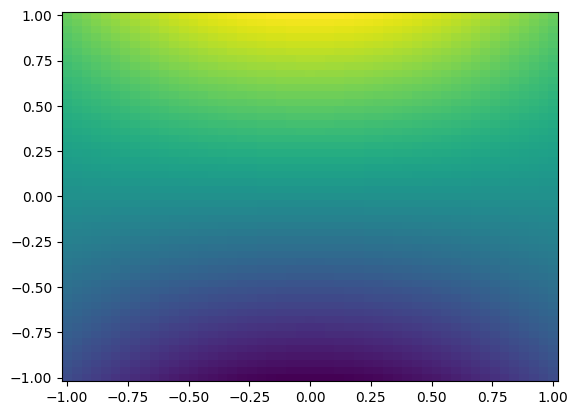

In [11]:
# example function : f(x,y) = y cos x on [-1,1]^2 
N = 51
xs = np.linspace(-1,1,N)
ys = np.linspace(-1,1,N)
mesh = np.meshgrid(xs,ys)
z = np.cos(mesh[0])*mesh[1]
plt.pcolormesh(xs, ys, z, shading='auto')

In [12]:
# example morphism : spiral!

def spiral(r,theta):
    return (r, theta+2*np.pi*r)

spir = morphism(spiral)

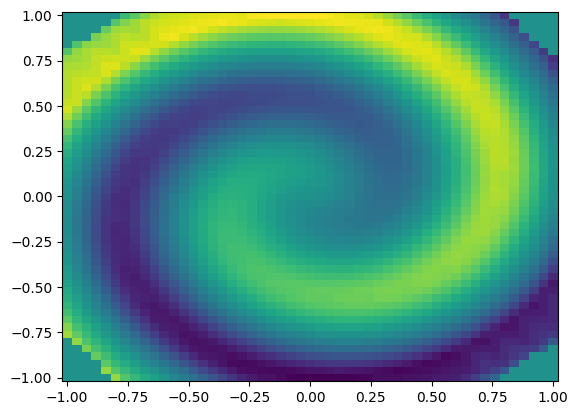

In [13]:
z2 = spir.morph_grid(z)
plt.pcolormesh(xs, ys, z2, shading='auto')

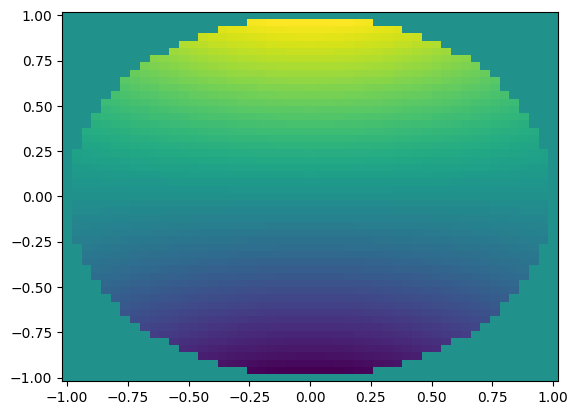

In [15]:
# example function2 : f(x,y) = y cos x in unit circle
N = 51
xs = np.linspace(-1,1,N)
ys = np.linspace(-1,1,N)
mesh = np.meshgrid(xs,ys)
z = np.cos(mesh[0])*mesh[1] * ((mesh[0]**2+mesh[1]**2)<1)
plt.pcolormesh(xs, ys, z, shading='auto')

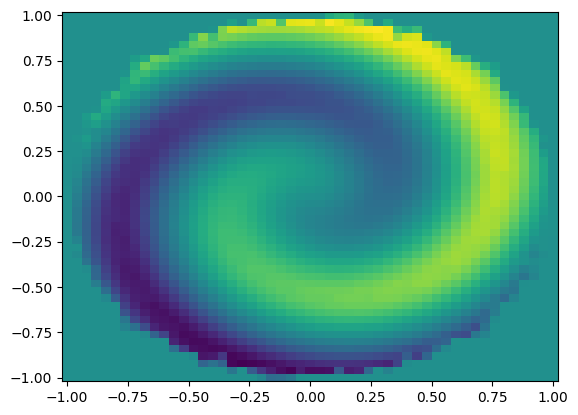

In [16]:
z2 = spir.morph_grid(z)
plt.pcolormesh(xs, ys, z2, shading='auto')